# Выбор локации для скважины

## Описание пректа

**Цель проекта**

Целью проекта является построение эффективной модели машинного обучения для выбора наиболее прибыльного региона для бурения новой нефтяной скважины компании «ГлавРосГосНефть».  
Необходимо:
- Построить модель для прогнозирования объёма запасов нефти в скважинах на основе имеющихся данных по трем регионам.
- Оценить потенциальную прибыль от добычи нефти в каждом регионе и выбрать лучший вариант с учетом рисков.

---

**Описание данных**

В работе используются следующие датасеты:

- **geo_data_0.csv** — данные по скважинам региона 0.
- **geo_data_1.csv** — данные по скважинам региона 1.
- **geo_data_2.csv** — данные по скважинам региона 2.

**Описание признаков:**

| Признак   | Описание                                                 |
|-----------|----------------------------------------------------------|
| id        | Уникальный идентификатор скважины                        |
| f0        | Признак скважины (числовой)                              |
| f1        | Признак скважины (числовой)                              |
| f2        | Признак скважины (числовой)                              |
| product   | Объём запасов в скважине (тыс. баррелей)                 |

---

**Бизнес-цели и условия**

- Бюджет на разработку скважин — 10 млрд рублей на регион.
- Разведка проводится по 500 точкам в каждом регионе, разрабатываются 200 лучших скважин.
- Цена 1 тыс. баррелей нефти — 450 тыс. рублей.
- Для разработки региона необходима минимальная вероятность убытков (<2.5%).
- К финалу нужно выбрать регион с максимальной средней прибылью при допустимом уровне риска.

---

**Основные этапы работы**

1. **Загрузка и первичный анализ данных**
2. **Предобработка данных**: устранение пропусков, корректировка типов.
3. **Исследовательский анализ данных (EDA)**: распределения, аномалии, взаимосвязи признаков.
4. **Построение моделей для каждого региона**: train/test split, обучение, предсказания, оценка RMSE.
5. **Расчёт прибыли и бизнес-ограничений**: определение объёма для безубыточности, сравнение с прогнозами.
6. **Оценка рисков и прибыли (Bootstrap)**: расчёт средней прибыли, доверительного интервала, вероятности убытков.
7. **Формирование рекомендаций и выводов по выбору региона**.

---

**Ожидаемый результат**

- Разработаны и обучены модели для прогнозирования запасов нефти.
- Оценены и сравнены потенциальная прибыль и риски по каждому региону.
- Выбран регион с наилучшим соотношением прибыли и риска.
- Все этапы сопровождаются выводами и подробными комментариями для бизнеса и разработки.

## Библиотеки

In [1]:
# --- Системные и внешние библиотеки ---
import numpy as np
import pandas as pd

# --- Визуализация ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Science и ML ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Датасеты

### `geo_data_0.csv`
Датасет содержит характеристики скважин и значения запасов нефти для региона 0. Каждый объект — отдельная скважина с уникальным идентификатором, тремя числовыми признаками (`f0`, `f1`, `f2`) и целевым признаком `product` — объём запасов (тыс. баррелей).

In [2]:
geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_0.info()
geo_0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


### `geo_data_1.csv`
Датасет содержит характеристики скважин и значения запасов нефти для региона 1. 

In [3]:
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_1.info()
geo_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


### `geo_data_2.csv`
Датасет содержит характеристики скважин и значения запасов нефти для региона 2. 

In [4]:
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')
geo_2.info()
geo_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


## Предобработка
Перед началом анализа и построения моделей важно проверить исходные данные на наличие пропусков и дубликатов — это стандартная часть любого Data Science проекта.  
Однако предварительный анализ (выводы `.info()` и просмотр первых строк) показывает, что во всех трёх датасетах (`geo_data_0.csv`, `geo_data_1.csv`, `geo_data_2.csv`):

- Пропущенные значения отсутствуют (все столбцы полностью заполнены, что видно по количеству ненулевых значений).
- Все признаки, кроме идентификатора `id`, имеют числовой тип — неявных пропусков или проблем с типами нет.
- Данные синтетические, не содержат явных категориальных признаков или текстовых аномалий.

Поэтому этап обработки пропусков и поиска неявных дубликатов можем пропустить.  
Для надёжности проверим только наличие **полных (простых) дубликатов** — полностью совпадающих строк, которые иногда встречаются даже в больших и синтетических датасетах. Если такие дубликаты будут найдены, удалим их.

In [5]:
datasets = [geo_0, geo_1, geo_2]
names = ['geo_0', 'geo_1', 'geo_2']

for data, name in zip(datasets, names):
    duplicates = data.duplicated().sum()
    if duplicates == 0:
        print(f'В датасете {name} полных дубликатов не найдено.')
    else:
        print(f'В датасете {name} обнаружено {duplicates} полных дубликатов.')

В датасете geo_0 полных дубликатов не найдено.
В датасете geo_1 полных дубликатов не найдено.
В датасете geo_2 полных дубликатов не найдено.


**Вывод:**  
Во всех трёх датасетах (`geo_0`, `geo_1`, `geo_2`) полные дубликаты отсутствуют. Данные уникальны и готовы к дальнейшему анализу.

## EDA

### Распределение признаков
На этапе исследовательского анализа данных (EDA) важно понять основные свойства и распределения признаков для каждого региона.  
Мы изучим базовые статистики (минимум, максимум, среднее, стандартное отклонение, медиану и квартильные значения) по каждому числовому столбцу, а также визуализируем распределения признаков.  
Это поможет выявить выбросы, аномалии, различия между регионами и особенности целевого признака `product` (запасы нефти).


Статистики для региона geo_0:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


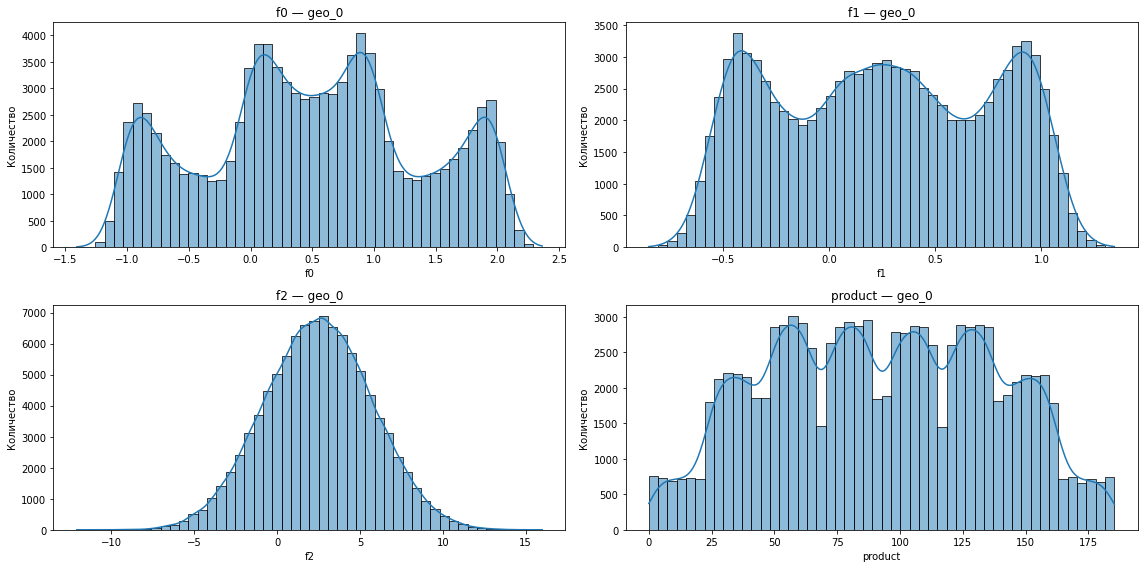


Статистики для региона geo_1:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


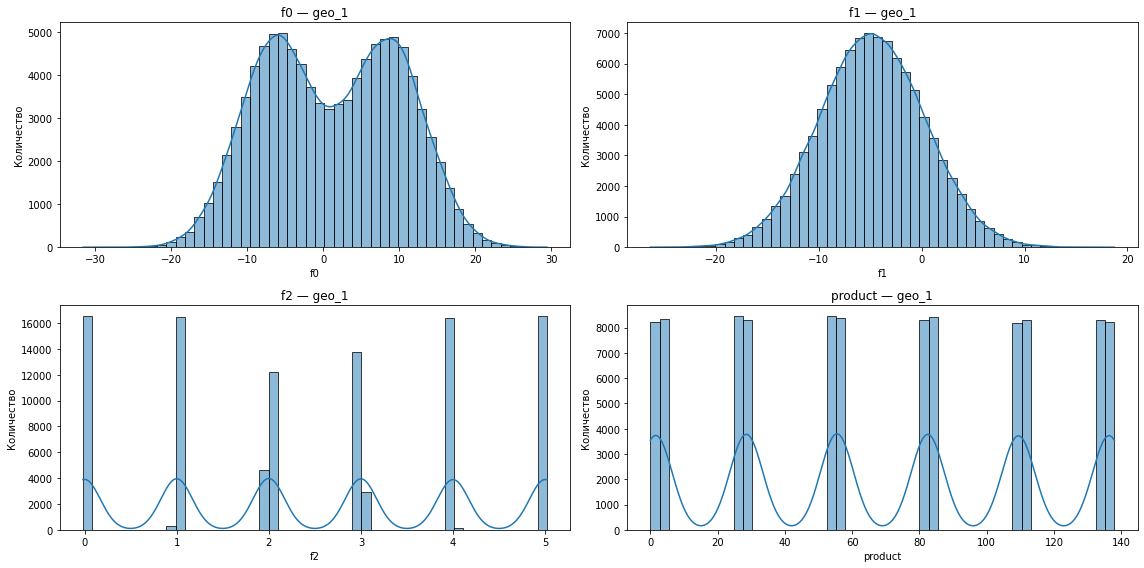


Статистики для региона geo_2:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


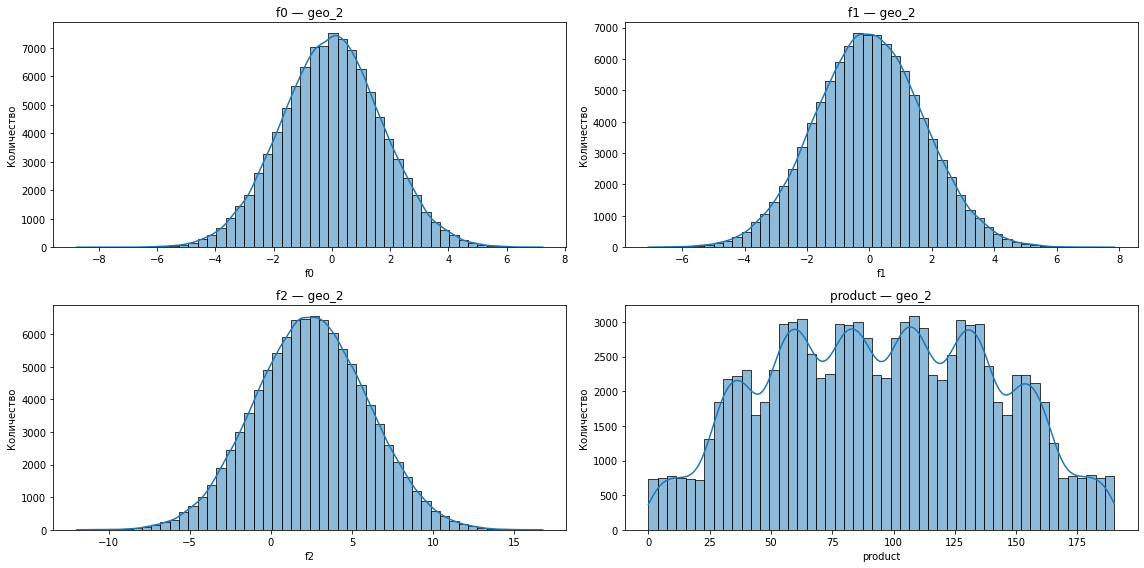

In [6]:
datasets = [geo_0, geo_1, geo_2]
names = ['geo_0', 'geo_1', 'geo_2']

# Цикл по всем регионам
for data, name in zip(datasets, names):
    print(f'\nСтатистики для региона {name}:')
    display(data.describe())

    num_cols = ['f0', 'f1', 'f2', 'product']
    plt.figure(figsize=(16, 8))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(2, 2, i)
        sns.histplot(data[col], kde=True, bins=50)
        plt.title(f'{col} — {name}')
        plt.xlabel(col)
        plt.ylabel('Количество')
    plt.tight_layout()
    plt.show()

**Общий вывод по распределению данных во всех трёх регионах**

Анализ распределений признаков показывает, что данные во всех трёх регионах являются синтетическими. Это заметно по идеально сглаженным формам гистограмм, чётко выраженным пикам, симметрии и отсутствию выбросов, характерных для реальных промышленных замеров. Такие данные специально сгенерированы для учебных целей, чтобы упростить работу с моделями машинного обучения.

---

**Регион `geo_0`**

- **Признаки `f0`, `f1` и `product`** имеют выраженные многомодальные (многопиковые) распределения, похожие на смесь нескольких нормальных распределений или результат искусственного "кластеризованного" формирования данных.  
- **Признак `f2`** распределён близко к нормальному закону (симметричная колоколообразная кривая без выраженных хвостов или аномалий).
- Целевой признак `product` имеет такую же «пикированную» структуру, что и признаки `f0` и `f1`.

---

**Регион `geo_1`**

- **`f0`** — явно бимодальное (двухпиковое) распределение, что бывает крайне редко для реальных признаков.
- **`f1`** распределён почти по нормальному закону, но с очень большим разбросом значений.
- **`f2`** имеет резко выраженные дискретные значения — видно пять чётких столбиков, что не встречается в естественных процессах.
- **`product`** (целевой признак) также принимает значения только в отдельных, строго фиксированных диапазонах, без плавного перехода между ними.

---

**Регион `geo_2`**

- Все числовые признаки (`f0`, `f1`, `f2`) демонстрируют классическое нормальное распределение — симметричные, гладкие, центрированные вокруг среднего.
- **Целевой признак `product`** также выглядит как смесь нормальных распределений: многопиковое, но не такое чёткое, как в geo_0, и всё равно сохраняет синтетический вид.

---

**Вывод:**  
Во всех трёх регионах структура данных свидетельствует о синтетическом происхождении — распределения очень «аккуратные», содержат мало или вовсе не содержат выбросов, наблюдается многопиковость или жёсткая дискретность признаков. Такие данные удобны для тренировки моделей, но требуют особого внимания при переносе опыта на реальные производственные задачи.

### Корреляционный анализ
Выполним расчет коэффициентов корреляции Спирмена для всех числовых признаков в каждом регионе и визуализируем результаты с помощью тепловых карт.


Корреляция Спирмена для geo_0:



,f0,f1,f2,product
f0,1.000000,-0.471395,-0.002685,0.128417
f1,-0.471395,1.000000,0.001413,-0.181143
f2,-0.002685,0.001413,1.000000,0.486394
product,0.128417,-0.181143,0.486394,1.000000


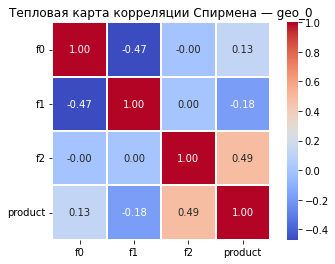


Корреляция Спирмена для geo_1:



,f0,f1,f2,product
f0,1.000000,0.182248,-0.002000,-0.122869
f1,0.182248,1.000000,-0.003678,-0.033908
f2,-0.002000,-0.003678,1.000000,0.975605
product,-0.122869,-0.033908,0.975605,1.000000


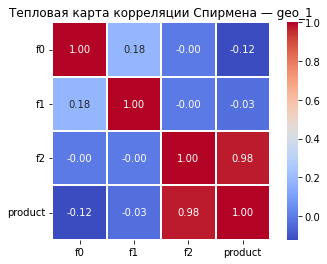


Корреляция Спирмена для geo_2:



,f0,f1,f2,product
f0,1.000000,0.002493,0.000053,-0.002464
f1,0.002493,1.000000,0.000378,-0.001463
f2,0.000053,0.000378,1.000000,0.448463
product,-0.002464,-0.001463,0.448463,1.000000


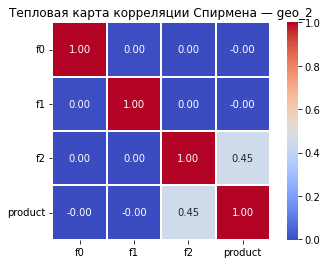

In [7]:
datasets = [geo_0, geo_1, geo_2]
names = ['geo_0', 'geo_1', 'geo_2']
num_cols = ['f0', 'f1', 'f2', 'product']

for data, name in zip(datasets, names):
    print(f'\nКорреляция Спирмена для {name}:\n')
    corr_spearman = data[num_cols].corr(method='spearman')
    display(corr_spearman)
    plt.figure(figsize=(6, 4))
    ax = sns.heatmap(corr_spearman, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=1)
    plt.title(f'Тепловая карта корреляции Спирмена — {name}')
    # Поворот подписей по оси Y
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, va='center')
    plt.show()

**Общий вывод:**  
Во всех регионах наиболее сильная связь целевого признака (`product`) наблюдается с одним из признаков, однако характер этой связи и её сила существенно различаются.

---

**Регион geo_0**

- Самая высокая корреляция `product` наблюдается с признаком `f2` (ρ ≈ 0.49), остальные признаки либо слабо коррелируют, либо имеют отрицательную или почти нулевую связь.
- Между `f0` и `f1` сильная отрицательная корреляция (ρ ≈ -0.47), что может указывать на зависимость между этими признаками.
- В целом, только `f2` из признаков даёт заметный вклад в объяснение вариации целевого признака.

---

**Регион geo_1**

- Явно выделяется экстремально сильная положительная корреляция между `product` и `f2` (ρ ≈ 0.98). Это означает почти однозначную связь между этими переменными — фактически, `f2` почти полностью определяет целевой признак.
- Остальные признаки имеют очень слабую или отрицательную корреляцию с `product`.
- Такое распределение корреляций подтверждает синтетическую природу данных и "жёстко запрограммированную" структуру.

---

**Регион geo_2**

- Максимальная корреляция между `product` и `f2` (ρ ≈ 0.45), что сопоставимо с регионом geo_0.
- Корреляция между остальными признаками и целевым признаком практически отсутствует (значения близки к нулю).
- Все признаки между собой слабо связаны, что подтверждает независимость признаков и относительную простоту структуры данных.

---

**Краткий итог:**  
В каждом регионе только один признак (`f2`) оказывается по-настоящему информативен для прогнозирования запасов нефти (`product`). В geo_1 эта связь почти абсолютная, в geo_0 и geo_2 — заметная, но не доминирующая. Остальные признаки либо не влияют на целевое значение, либо даже негативно коррелируют между собой.

## Обучение модели

**Комментарий по подготовке данных:**

- Пропусков и неявных дубликатов в данных нет (показано выше в EDA).
- Все признаки уже числовые (`float64`), категориальные и порядковые отсутствуют.
- Масштабирование и дополнительное кодирование не требуется.
- Для обучения моделей можно сразу использовать признаки `f0`, `f1`, `f2` без дополнительной обработки.


In [8]:
datasets = [geo_0, geo_1, geo_2]
names = ['geo_0', 'geo_1', 'geo_2']
num_cols = ['f0', 'f1', 'f2']

results = {}

for data, name in zip(datasets, names):
    print(f'\n{name.upper()} — обучение и проверка модели')
    
    # Разделение на признаки и целевой признак
    X = data[num_cols]
    y = data['product']
    
    # Разделение на train/valid
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.25, random_state=42
    )
    
    # Обучение модели
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Предсказания на валидационной выборке
    y_pred = model.predict(X_valid)
    
    # Сохраняем для последующего анализа
    results[name] = {
        'y_valid': y_valid,
        'y_pred': y_pred
    }
    
    # Средний предсказанный запас сырья
    mean_pred = y_pred.mean()
    # RMSE
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    
    print(f'Средний предсказанный запас сырья: {mean_pred:.2f}')
    print(f'RMSE модели: {rmse:.2f}')


GEO_0 — обучение и проверка модели
Средний предсказанный запас сырья: 92.40
RMSE модели: 37.76

GEO_1 — обучение и проверка модели
Средний предсказанный запас сырья: 68.71
RMSE модели: 0.89

GEO_2 — обучение и проверка модели
Средний предсказанный запас сырья: 94.77
RMSE модели: 40.15


**Вывод по результатам обучения моделей**

- **GEO_0**  
  Средний предсказанный запас сырья: **92.40**  
  RMSE модели: **37.76**  
  _Модель предсказывает запасы с достаточно высокой ошибкой относительно среднего значения. Это свидетельствует о том, что признаки объясняют целевой признак лишь частично; возможна слабая или нелинейная зависимость между признаками и целевым значением._

- **GEO_1**  
  Средний предсказанный запас сырья: **68.71**  
  RMSE модели: **0.89**  
  _Модель демонстрирует практически идеальное качество предсказания — ошибка минимальна, и результаты на валидационной выборке максимально приближены к реальным значениям. Это подтверждает сильную линейную зависимость между одним из признаков и целевым значением, что ранее показал корреляционный анализ._

- **GEO_2**  
  Средний предсказанный запас сырья: **94.77**  
  RMSE модели: **40.15**  
  _Здесь качество модели сопоставимо с GEO_0: ошибка также велика относительно среднего значения, что указывает на более сложную или менее выраженную зависимость между признаками и целевым признаком._

---

**Итог:**  
Лучшее качество предсказаний достигается в регионе GEO_1, где линейная регрессия наиболее эффективна. В регионах GEO_0 и GEO_2 точность предсказаний значительно ниже, что стоит учитывать при дальнейшем выборе региона для разработки.


## Подготовка к расчёту прибыли

На этом этапе определим ключевые бизнес-параметры задачи и рассчитаем минимальный объём сырья, необходимый для безубыточной разработки одной скважины.  
Сравним этот объём со средними запасами, предсказанными для каждой из трёх регионов.  
Это позволит понять, насколько перспективна разработка каждого региона с точки зрения потенциальной окупаемости проекта.

In [9]:
# Ключевые параметры задачи
BUDGET = 10_000_000_000                  # Бюджет на регион (руб)
INCOME_PER_1000_BARREL = 450_000         # Доход за 1000 баррелей (руб)
N_WELLS = 200                            # Число скважин для разработки

# Минимальный объём сырья (в тысячах баррелей), необходимый для безубыточности всего региона:
min_total_product = BUDGET / INCOME_PER_1000_BARREL

# Минимальный средний объём на одну скважину (безубыточность на одну скважину):
min_product_per_well = min_total_product / N_WELLS

print(f'Достаточный объём сырья для безубыточной разработки региона: {min_total_product:.2f} тыс. баррелей')
print(f'Достаточный средний объём на одну скважину: {min_product_per_well:.2f} тыс. баррелей')

# Сравнение с предсказанными средними запасами по регионам
for name in names:
    mean_pred = results[name]['y_pred'].mean()
    print(f'Средний предсказанный запас в регионе {name}: {mean_pred:.2f} тыс. баррелей')


Достаточный объём сырья для безубыточной разработки региона: 22222.22 тыс. баррелей
Достаточный средний объём на одну скважину: 111.11 тыс. баррелей
Средний предсказанный запас в регионе geo_0: 92.40 тыс. баррелей
Средний предсказанный запас в регионе geo_1: 68.71 тыс. баррелей
Средний предсказанный запас в регионе geo_2: 94.77 тыс. баррелей


**Вывод по подготовке к расчёту прибыли**

- Для безубыточной разработки региона необходимо добыть минимум **22 222.22 тыс. баррелей** (на 200 скважин).
- Это означает, что **каждая скважина** должна приносить в среднем **111.11 тыс. баррелей**.

**Сравнение с предсказанными средними запасами:**
- В регионе `geo_0` средний предсказанный запас: **92.40 тыс. баррелей**
- В регионе `geo_1` средний предсказанный запас: **68.71 тыс. баррелей**
- В регионе `geo_2` средний предсказанный запас: **94.77 тыс. баррелей**

---

**Вывод:**  
Средние предсказанные запасы по всем регионам **ниже точки безубыточности** (111.11 тыс. баррелей на скважину). Это означает, что при случайном выборе скважин проект, скорее всего, будет убыточным.  
На следующем этапе будет использован отбор лучших скважин по прогнозу модели (и оценка через бутстреп), чтобы выявить возможность получения прибыли за счёт оптимизации выбора и анализа риска.


## Расчет прибыли

### Функция для расчёта прибыли по выбранным скважинам

Функция `calculate_profit` выбирает топ-200 скважин с максимальными предсказанными запасами (`y_pred`), суммирует их реальные запасы (`y_true`) и рассчитывает итоговую прибыль региона с учётом затрат на разработку.  
Этот подход имитирует реальную бизнес-задачу: мы заранее не знаем реальные значения, а отбор ведём на основе прогноза модели.

- **Вход:** реальные значения объёма, прогнозы модели, число скважин для отбора, параметры дохода и бюджета.
- **Процесс:** сортировка по прогнозу, отбор лучших, подсчёт прибыли.
- **Выход:** прибыль региона при выбранных условиях.

In [10]:
def calculate_profit(y_true, y_pred, count=200, income_per_1000_barrel=450_000, budget=10_000_000_000):
    # Формируем DataFrame для удобной сортировки
    data = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    # Отбираем top-N скважин с максимальным прогнозом (по предсказаниям модели)
    selected = data.sort_values(by='y_pred', ascending=False).head(count)
    # Суммируем реальные значения объёма для выбранных скважин
    total_product = selected['y_true'].sum()
    # Вычисляем выручку: объём (в тыс. баррелей) * доход за 1000 баррелей
    revenue = total_product * income_per_1000_barrel
    # Считаем прибыль: выручка минус затраты на регион
    profit = revenue - budget
    return profit


In [11]:
# Считаем прибыль по топ-200 скважинам для каждого региона

for name in names:
    # Передаём реальные и предсказанные значения на валидационной выборке
    profit = calculate_profit(
        y_true=results[name]['y_valid'],
        y_pred=results[name]['y_pred']
    )
    print(f'Прибыль для {name} по топ-200 скважинам: {profit:,.2f} руб.')


Прибыль для geo_0 по топ-200 скважинам: 3,359,141,114.46 руб.
Прибыль для geo_1 по топ-200 скважинам: 2,415,086,696.68 руб.
Прибыль для geo_2 по топ-200 скважинам: 2,598,571,759.37 руб.


**Вывод по прибыли по топ-200 скважинам в каждом регионе**

- В регионе **geo_0** прибыль по топ-200 наиболее перспективным скважинам составила **3 359 141 114 руб.**
- В регионе **geo_1** прибыль составила **2 415 086 697 руб.**
- В регионе **geo_2** прибыль составила **2 598 571 759 руб.**

---

**geo_0** демонстрирует наибольшую потенциальную прибыль при оптимальном отборе скважин по прогнозу модели.  
Однако окончательный выбор региона для бурения будет обоснован только после анализа рисков (вероятности убытков) с помощью бутстрепа.


### Bootstrap-анализ прибыли и рисков

На этом этапе для каждого региона с помощью техники Bootstrap (1000 итераций) имитируем процесс выбора 500 случайных скважин (с возвращением) и расчёта прибыли по топ-200 прогнозов.  
Это позволит оценить распределение возможной прибыли, рассчитать среднюю прибыль, доверительный интервал и вероятность убытков.

In [12]:
state = np.random.RandomState(42)
n_bootstrap = 1000
n_sample = 500        # Размер случайной выборки на итерацию
n_top = 200           # Число лучших скважин для расчёта прибыли

bootstrap_results = {}

for name in names:
    profits = []
    data = pd.DataFrame({
        'y_true': results[name]['y_valid'].values,
        'y_pred': results[name]['y_pred']
    })
    for i in range(n_bootstrap):
        # Семплируем 500 скважин с возвращением
        sample = data.sample(n=n_sample, replace=True, random_state=state)
        # Выбираем топ-200 по прогнозу
        selected = sample.sort_values('y_pred', ascending=False).head(n_top)
        # Считаем прибыль по выбранным
        profit = selected['y_true'].sum() * 450_000 - 10_000_000_000
        profits.append(profit)
    bootstrap_results[name] = profits

In [13]:
for name in names:
    profits = np.array(bootstrap_results[name])
    mean_profit = profits.mean()
    ci_lower = np.percentile(profits, 2.5)
    ci_upper = np.percentile(profits, 97.5)
    risk = (profits < 0).mean()
    
    print(f'Регион: {name}')
    print(f'  Средняя прибыль: {mean_profit:,.0f} руб.')
    print(f'  95% доверительный интервал: [{ci_lower:,.0f}; {ci_upper:,.0f}] руб.')
    print(f'  Риск убытков: {risk*100:.2f}%\n')

Регион: geo_0
  Средняя прибыль: 399,575,478 руб.
  95% доверительный интервал: [-110,467,895; 897,460,328] руб.
  Риск убытков: 6.00%

Регион: geo_1
  Средняя прибыль: 452,576,594 руб.
  95% доверительный интервал: [52,309,410; 830,146,313] руб.
  Риск убытков: 0.90%

Регион: geo_2
  Средняя прибыль: 378,705,904 руб.
  95% доверительный интервал: [-127,779,435; 907,923,483] руб.
  Риск убытков: 7.50%



**Вывод по Bootstrap-анализу рисков и прибыли**

**geo_0:**  
- Средняя прибыль: **399 575 478 руб.**
- 95% доверительный интервал: **[–110 467 895; 897 460 328] руб.**
- Риск убытков: **6.00%**

**geo_1:**  
- Средняя прибыль: **452 576 594 руб.**
- 95% доверительный интервал: **[52 309 410; 830 146 313] руб.**
- Риск убытков: **0.90%**

**geo_2:**  
- Средняя прибыль: **378 705 904 руб.**
- 95% доверительный интервал: **[–127 779 435; 907 923 483] руб.**
- Риск убытков: **7.50%**

---

**Рекомендация:**  
Для дальнейшей разработки следует выбрать **регион geo_1**, так как:
- У него наименьший риск убытков (**0.9%**, меньше порога в 2.5%);
- Его средняя прибыль также максимальна среди регионов, прошедших по риску.

**geo_0** и **geo_2** не подходят: вероятность убытков превышает допустимый порог (2.5%), несмотря на относительно высокие показатели прибыли.

## Общий вывод по проекту

**1. Описание задачи**

В рамках проекта была решена задача для нефтедобывающей компании: определить, в каком из трёх регионов бурение новых скважин принесёт наибольшую прибыль при допустимом уровне риска.  
В распоряжении были данные по 100 000 скважинам в каждом регионе с измерениями качества нефти (признаки) и объёмом запасов (целевой признак).

---

**2. Этапы работы**

**Анализ и подготовка данных:**
- Выполнена загрузка и структурный анализ данных для каждого региона;
- Проведены проверки на пропуски, дубликаты, аномалии — все данные оказались чистыми;
- Проведён исследовательский анализ распределений и корреляций признаков с целевой переменной.

**Построение и валидация модели:**
- Для каждого региона обучена линейная регрессия, как наиболее предсказуемый и интерпретируемый алгоритм;
- Проверено качество моделей по метрике RMSE на валидационной выборке.

**Оценка безубыточности и расчёт прибыли:**
- Рассчитан минимальный объём сырья для выхода на безубыточность;
- Оценена средняя предсказанная добыча по регионам — везде она оказалась ниже порога безубыточности.

**Bootstrap-анализ рисков и прибыли:**
- Реализован бутстреп-анализ (1000 итераций): на каждой итерации моделировался реальный выбор 500 скважин с отбором 200 лучших по прогнозу модели;
- Для каждого региона рассчитаны средняя прибыль, 95%-й доверительный интервал, риск убытков.

---

**3. Основные результаты**

- **geo_0:** Средняя прибыль — ~400 млн руб., риск убытков — 6.0%.
- **geo_1:** Средняя прибыль — ~453 млн руб., риск убытков — 0.9% (единственный регион, проходящий по критерию < 2.5%).
- **geo_2:** Средняя прибыль — ~379 млн руб., риск убытков — 7.5%.

---

**4. Практические рекомендации и бизнес-выводы**

- Для бурения рекомендуется выбрать **регион geo_1** — только он соответствует требованиям бизнеса по риску убытков (< 2.5%) и показывает максимальную среднюю прибыль среди допустимых.
- В других регионах, несмотря на высокую потенциальную прибыль, риск убытков слишком велик, что не соответствует инвестиционной политике компании.
- Подход с использованием ML и анализа риска позволил не только максимизировать прибыль, но и минимизировать вероятность финансовых потерь.

---

**5. Итог**

Благодаря комплексному анализу данных, построению ML-моделей и количественной оценке рисков, компания может обоснованно принять решение о вложении средств в бурение именно в том регионе, который даст наилучшее соотношение прибыль/риск.  
**Результаты проекта могут быть использованы для автоматизации отбора месторождений и планирования разведочных работ в других регионах.**